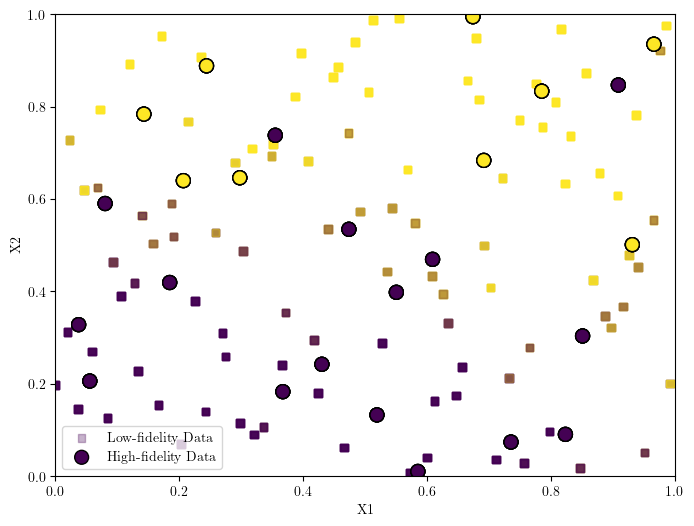

Starting training...
Epoch 100/1000, Loss: 332.6328
  Rho: 1.2326
  LF model lengthscale: 0.5480, outputscale: 1.1111
  Delta model lengthscale: 1.2297, outputscale: 0.1140
Epoch 200/1000, Loss: 329.4821
  Rho: 1.2427
  LF model lengthscale: 0.5759, outputscale: 1.8277
  Delta model lengthscale: 1.5465, outputscale: 0.0233
Epoch 300/1000, Loss: 328.4472
  Rho: 1.2289
  LF model lengthscale: 0.6184, outputscale: 2.4569
  Delta model lengthscale: 1.5979, outputscale: 0.0083
Epoch 400/1000, Loss: 328.0496
  Rho: 1.2210
  LF model lengthscale: 0.6475, outputscale: 2.9076
  Delta model lengthscale: 1.6075, outputscale: 0.0043
Epoch 500/1000, Loss: 327.7892
  Rho: 1.2156
  LF model lengthscale: 0.6729, outputscale: 3.3542
  Delta model lengthscale: 1.6099, outputscale: 0.0027
Epoch 600/1000, Loss: 327.6497
  Rho: 1.2117
  LF model lengthscale: 0.6898, outputscale: 3.6801
  Delta model lengthscale: 1.6102, outputscale: 0.0019
Epoch 700/1000, Loss: 327.5336
  Rho: 1.2082
  LF model lengthscale

/Users/murray/Projects/MultiFidelityActiveLearning/src/utils_plotting.py:142: UserWarning: The following kwargs were not used by contour: 'label'
  ax_hf.contour(xx, yy, true_p_HF, levels=[0.25, 0.5, 0.75], colors='k', linewidths=1, linestyles='--', label='True P_HF')
/Users/murray/Projects/MultiFidelityActiveLearning/src/utils_plotting.py:147: UserWarning: The following kwargs were not used by contour: 'label'
  ax_lf.contour(xx, yy, true_p_LF, levels=[0.25, 0.5, 0.75], colors='k', linewidths=1, linestyles='--', label='True P_LF')


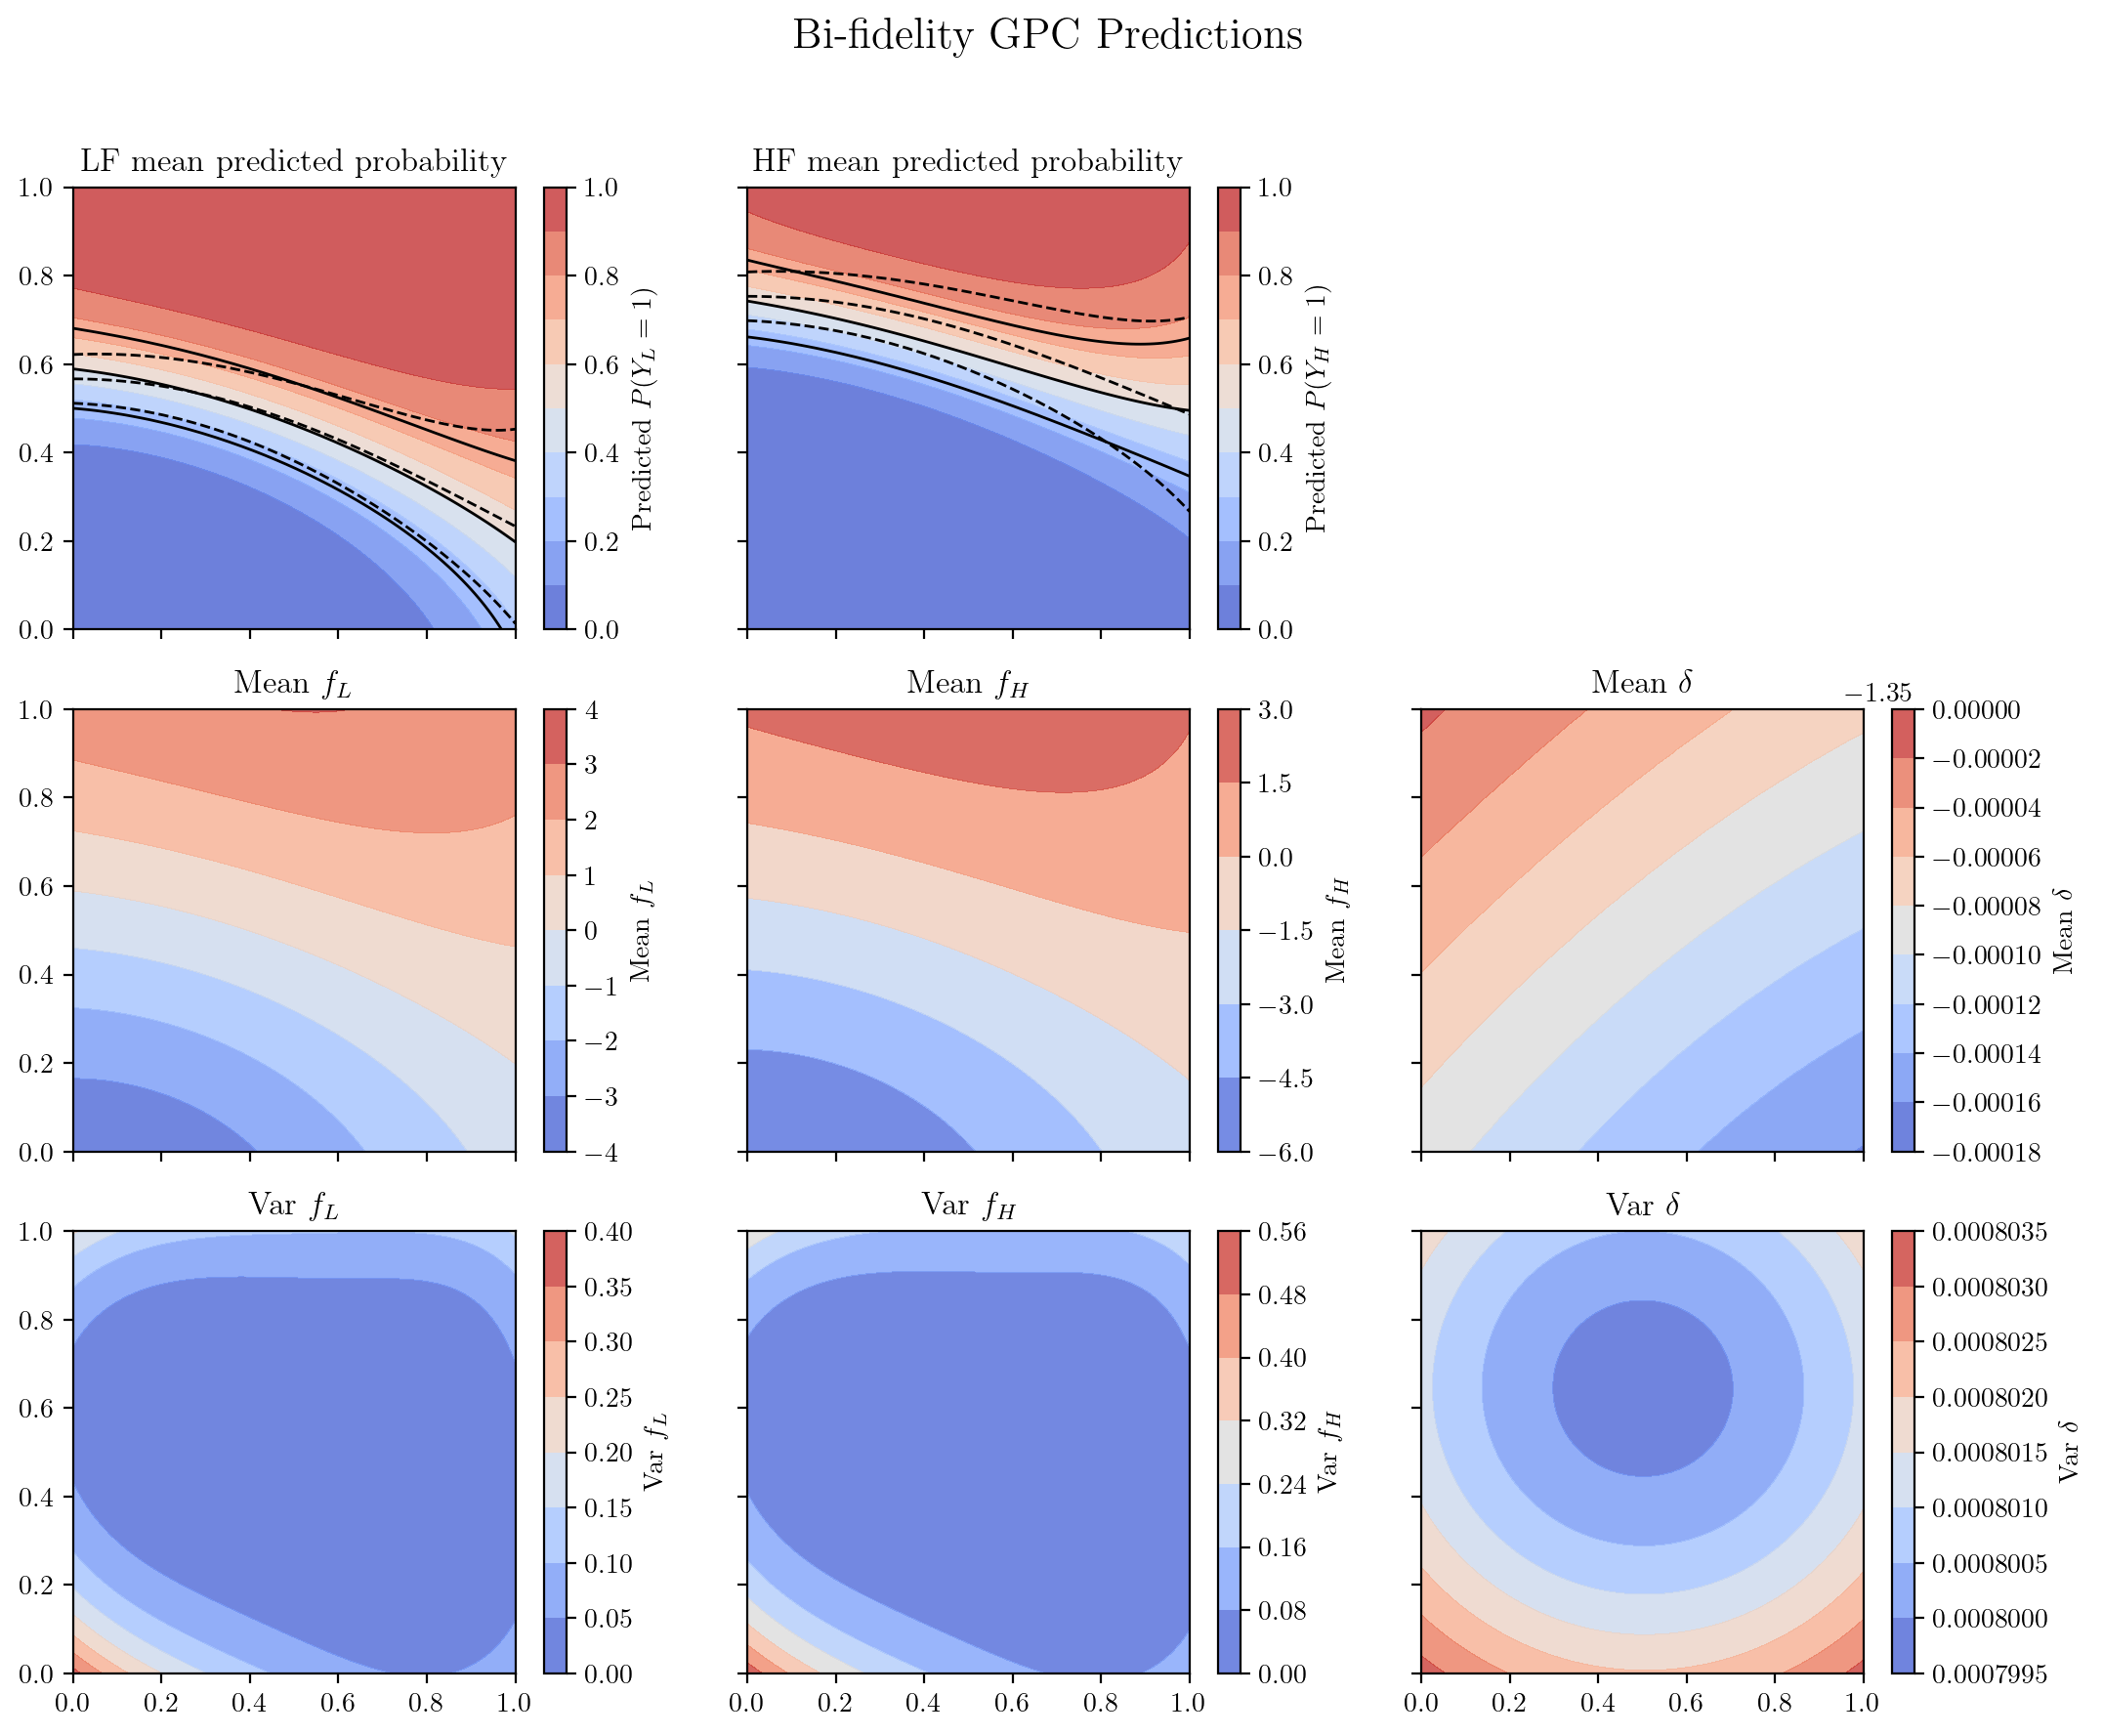

-171.69732666015625


In [9]:
import numpy as np
import logging

import pyDOE
import torch

from src.bfgpc import BFGPC_ELBO
from src.toy_example import create_smooth_change_linear, create_smooth_change_nonlinear
from src.utils_plotting import plot_bfgpc_predictions_two_axes, plot_bf_training_data

logging.basicConfig(level=logging.INFO)

linear_low_f1, linear_high_f1, p_LF_toy, p_HF_toy = create_smooth_change_linear()

def sampling_function_L(X_normalized):  # Expects N x 2 normalized input
    Y_linear_low_grid, probs_linear_low_grid = linear_low_f1(X_normalized, reps=1)
    Y_linear_high_grid = Y_linear_low_grid.mean(axis=0)
    return Y_linear_high_grid

def sampling_function_H(X_normalized):
    Y_linear_high_grid, probs_linear_high_grid = linear_high_f1(X_normalized, reps=1)
    Y_linear_high_grid = Y_linear_high_grid.mean(axis=0)
    return Y_linear_high_grid

inducing_points = pyDOE.lhs(2, 256, criterion='maximin', iterations=10)
model = BFGPC_ELBO(train_x_lf=torch.tensor(inducing_points).float(), train_x_hf=torch.tensor(inducing_points).float())

X_L_train = pyDOE.lhs(2, 100, criterion='maximin', iterations=3)
X_L_train = np.repeat(X_L_train, 10, axis=0)
Y_L_train = sampling_function_L(X_L_train)

X_H_train = pyDOE.lhs(2, 25, criterion='maximin', iterations=3)
X_H_train = np.repeat(X_H_train, 5, axis=0)
Y_H_train = sampling_function_H(X_H_train)

plot_bf_training_data(X_L_train, Y_L_train, X_H_train, Y_H_train)

model.train_model(X_LF=X_L_train, Y_LF=Y_L_train, X_HF=X_H_train, Y_HF=Y_H_train, lr=0.1, n_epochs=1000)

plot_bfgpc_predictions_two_axes(model, true_p_HF=p_HF_toy, true_p_LF=p_LF_toy)

X_H_test = pyDOE.lhs(2, 512, criterion='maximin', iterations=3)
Y_H_test = sampling_function_H(X_H_test)

elpp = model.evaluate_elpp(X_H_test, Y_H_test)
print(elpp)

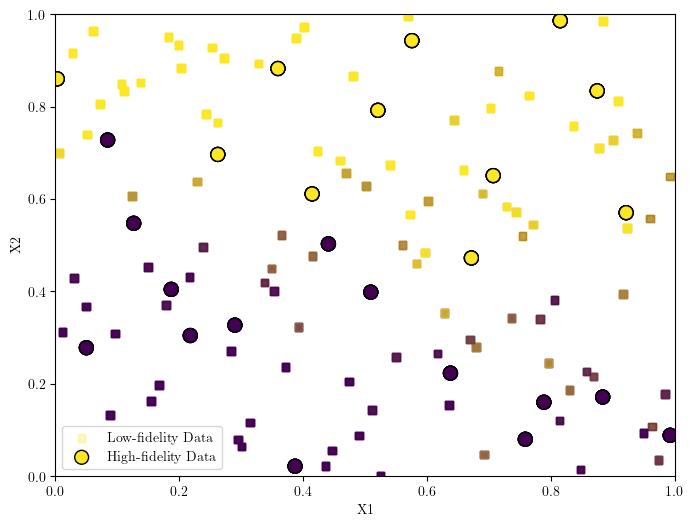

Starting training...
Epoch 100/1000, Loss: 353.6580
  Rho: 1.3119
  LF model lengthscale: 0.4860, outputscale: 1.2098
  Delta model lengthscale: 0.2389, outputscale: 0.7978
Epoch 200/1000, Loss: 350.3241
  Rho: 1.3354
  LF model lengthscale: 0.5264, outputscale: 2.0093
  Delta model lengthscale: 0.2520, outputscale: 0.9874
Epoch 300/1000, Loss: 349.4856
  Rho: 1.3277
  LF model lengthscale: 0.5623, outputscale: 2.6871
  Delta model lengthscale: 0.2573, outputscale: 1.0043
Epoch 400/1000, Loss: 348.9908
  Rho: 1.3272
  LF model lengthscale: 0.5859, outputscale: 3.2404
  Delta model lengthscale: 0.2590, outputscale: 1.0153
Epoch 500/1000, Loss: 348.8003
  Rho: 1.3256
  LF model lengthscale: 0.6057, outputscale: 3.7138
  Delta model lengthscale: 0.2614, outputscale: 1.0249
Epoch 600/1000, Loss: 348.5771
  Rho: 1.3244
  LF model lengthscale: 0.6228, outputscale: 4.1157
  Delta model lengthscale: 0.2617, outputscale: 1.0209
Epoch 700/1000, Loss: 348.4576
  Rho: 1.3224
  LF model lengthscale

/Users/murray/Projects/MultiFidelityActiveLearning/src/utils_plotting.py:142: UserWarning: The following kwargs were not used by contour: 'label'
  ax_hf.contour(xx, yy, true_p_HF, levels=[0.25, 0.5, 0.75], colors='k', linewidths=1, linestyles='--', label='True P_HF')
/Users/murray/Projects/MultiFidelityActiveLearning/src/utils_plotting.py:147: UserWarning: The following kwargs were not used by contour: 'label'
  ax_lf.contour(xx, yy, true_p_LF, levels=[0.25, 0.5, 0.75], colors='k', linewidths=1, linestyles='--', label='True P_LF')


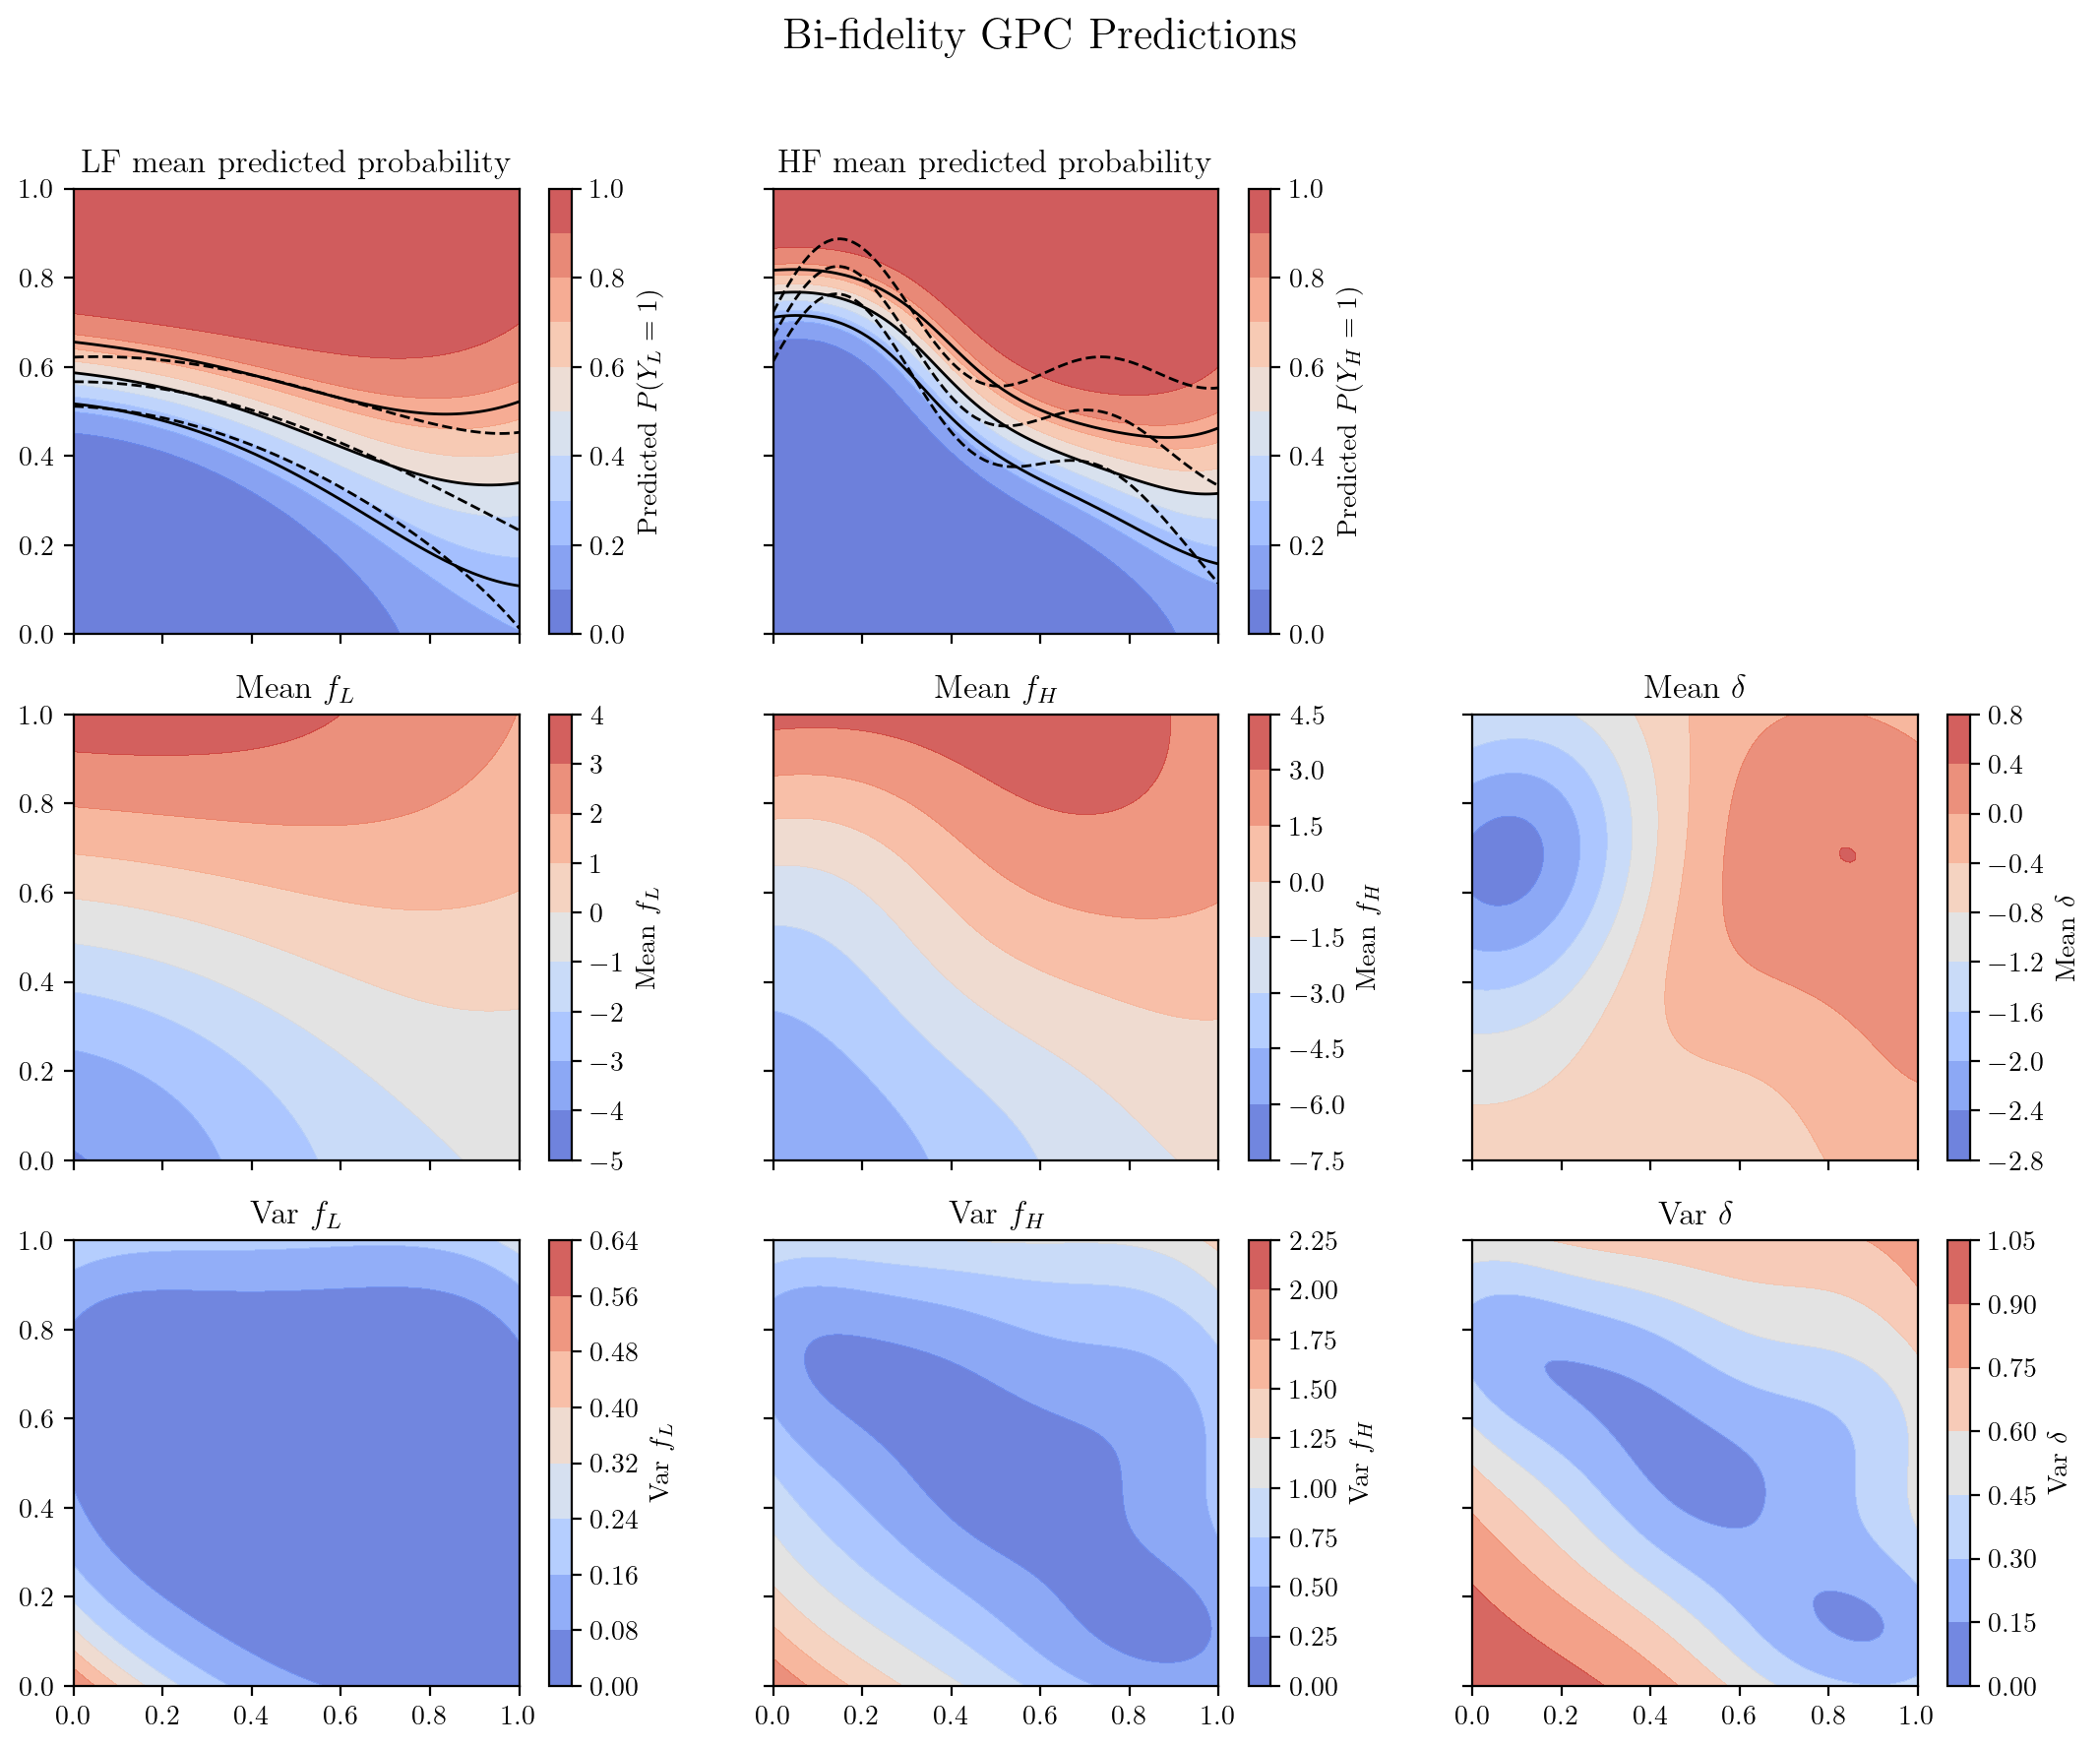

-178.707275390625


In [10]:
linear_low_f1, linear_high_f1, p_LF_toy, p_HF_toy = create_smooth_change_nonlinear()

def sampling_function_L(X_normalized):  # Expects N x 2 normalized input
    Y_linear_low_grid, probs_linear_low_grid = linear_low_f1(X_normalized, reps=1)
    Y_linear_high_grid = Y_linear_low_grid.mean(axis=0)
    return Y_linear_high_grid

def sampling_function_H(X_normalized):
    Y_linear_high_grid, probs_linear_high_grid = linear_high_f1(X_normalized, reps=1)
    Y_linear_high_grid = Y_linear_high_grid.mean(axis=0)
    return Y_linear_high_grid

inducing_points = pyDOE.lhs(2, 256, criterion='maximin', iterations=10)
model = BFGPC_ELBO(train_x_lf=torch.tensor(inducing_points).float(), train_x_hf=torch.tensor(inducing_points).float())

X_L_train = pyDOE.lhs(2, 100, criterion='maximin', iterations=3)
X_L_train = np.repeat(X_L_train, 10, axis=0)
Y_L_train = sampling_function_L(X_L_train)

X_H_train = pyDOE.lhs(2, 25, criterion='maximin', iterations=3)
X_H_train = np.repeat(X_H_train, 5, axis=0)
Y_H_train = sampling_function_H(X_H_train)

plot_bf_training_data(X_L_train, Y_L_train, X_H_train, Y_H_train)

model.train_model(X_LF=X_L_train, Y_LF=Y_L_train, X_HF=X_H_train, Y_HF=Y_H_train, lr=0.1, n_epochs=1000)

plot_bfgpc_predictions_two_axes(model, true_p_HF=p_HF_toy, true_p_LF=p_LF_toy)

X_H_test = pyDOE.lhs(2, 512, criterion='maximin', iterations=3)
Y_H_test = sampling_function_H(X_H_test)

elpp = model.evaluate_elpp(X_H_test, Y_H_test)
print(elpp)

